In [2]:
############ set-width of the notebook ###############################
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [1]:
from IPython.display import display, IFrame

# Replace 'yourfile.pdf' with the path to your PDF file
file_path = 'heat_eqn_2D.pdf'

# Display the PDF
display(IFrame(file_path, width=800, height=600))

In [3]:
############ import libraries ###############################
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

# %matplotlib inline

#### 2D heat equation/2D PDE solver
For heat equation, $$ \begin{equation}
\frac{\partial{u}}{\partial{t}}=\alpha\left(\frac{\partial^2{u}}{\partial{x^2}}+\frac{\partial^2{u}}{\partial{y^2}}\right)
\end{equation},
$$
the maximum value allowed for the solution to be stable is $\Delta t < \Delta t_{max}=\frac{\Delta x^2}{4 \alpha} $. Exactly similar to the 1D case except the addition of second order diff along y axis.

In [4]:
#############################################################
# coefficients
alpha = 2

# x-axis details
xlen = 1
nx = 60
x = np.linspace(-xlen, xlen, nx)
delx = x[1] - x[0]

# y-axis details
ylen = 1.5
ny = 60
y = np.linspace(-ylen, ylen, ny)
dely = y[1] - y[0]

# create mesgrid
X, Y = np.meshgrid(x,y)

# time-axis details: define max_iter_time as nt
nt = 300
delt_max = (delx ** 2)/(4 * alpha)
delt = delt_max/2
gamma = (alpha * delt) / (delx ** 2)
print(f"delt = {round(delt, 4)}, delt_max = {round(delt_max, 4)}, delt_max/delt = {round(delt_max/delt, 1)}")

delt = 0.0001, delt_max = 0.0001, delt_max/delt = 2.0


In [5]:
###################################################################################################################
# Initialize solution: the grid of u(k, i, j)
u = np.empty((nt, nx, ny))
u;
################# Set the initial condition #################################################
for k in range(1):
    for i in range(nx):
        for j in range( ny):
            u[k , i, j] = np.cos(j*dely) + np.sin(i*delx)
u;
########### Boundary conditions ################################
u_top = 100.0
u_left = 0.0
u_bottom = 0.0
u_right = 0.0

u[:, :1, :] = u_left
u[:, nx-1:, :] = u_right
u[:, :, :1] = u_bottom
u[:, :, ny-1:] = u_top

In [6]:
############################# Func: define PDE ###########################################
def calculate(u):
    for k in range(0, nt-1, 1):
        for i in range(1, nx-1, 1):
            for j in range(1, ny-1, 1):
                uxx = u[k, i+1, j] + u[k, i-1, j] - 2*u[k, i, j]
                uyy = u[k, i, j+1] + u[k, i, j-1] - 2*u[k, i, j]
                u[k + 1, i, j] = gamma * (uxx + uyy) + u[k][i][j]
    return u

def plotheatmap(u_k, k):
    plt.clf()
    plt.title(f"Temperature at t = {k*delt:.3f} unit time")
    plt.xlabel("x")
    plt.ylabel("y")
    # This is to plot u_k (u at time-step k)
    plt.pcolormesh(u_k, cmap=plt.cm.jet, vmin=0, vmax=100)
    plt.colorbar()

#     return pltdefine PDE

In [7]:
# Do the calculation here (Solve PDE!)
u = calculate(u)

In [8]:
########### code for animated solution ######################################################################
# def animate(k):
#     plotheatmap(u[k], k)

# anim = animation.FuncAnimation(plt.figure(), animate, interval=1, frames=max_iter_time, repeat=False)
# anim.save("heat_equation_solution.gif")

# print("Done!")

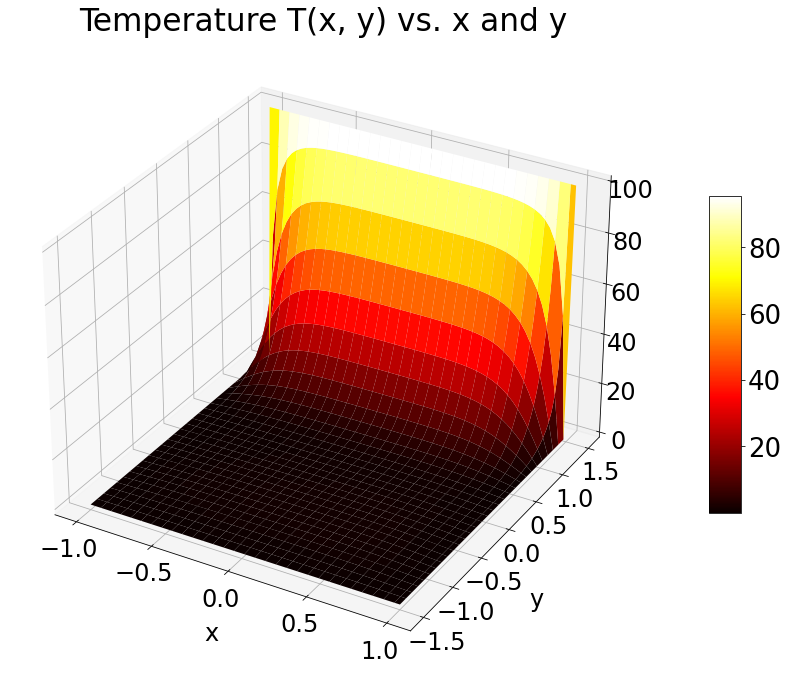

In [9]:
########### 3D plot ######################################################################
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
# Creating dataset
Xgrid = X; Ygrid = Y; time = nt - 1
surface = u[time,:,:]
 
# Creating figure and fig-properties
fig = plt.figure(figsize =(20, 10))
ax = plt.axes(projection ='3d')
plt.rcParams['font.size'] = '26'
 
# Creating color map
my_cmap = plt.get_cmap('hot')
 
# Creating plot and colorbar
surf = ax.plot_surface(Xgrid, Ygrid, np.transpose(surface), cmap = my_cmap, edgecolor ='none') 
fig.colorbar(surf, ax = ax, shrink = 0.5, aspect = 10)
 
ax.set_title('Temperature T(x, y) vs. x and y')
ax.set_xlabel("\n\nx")
ax.set_ylabel("\n\n\ny")
 
#######plt.savefig('temperature_plot_3D.png',facecolor="w", transparent=True, dpi=300)
plt.show()

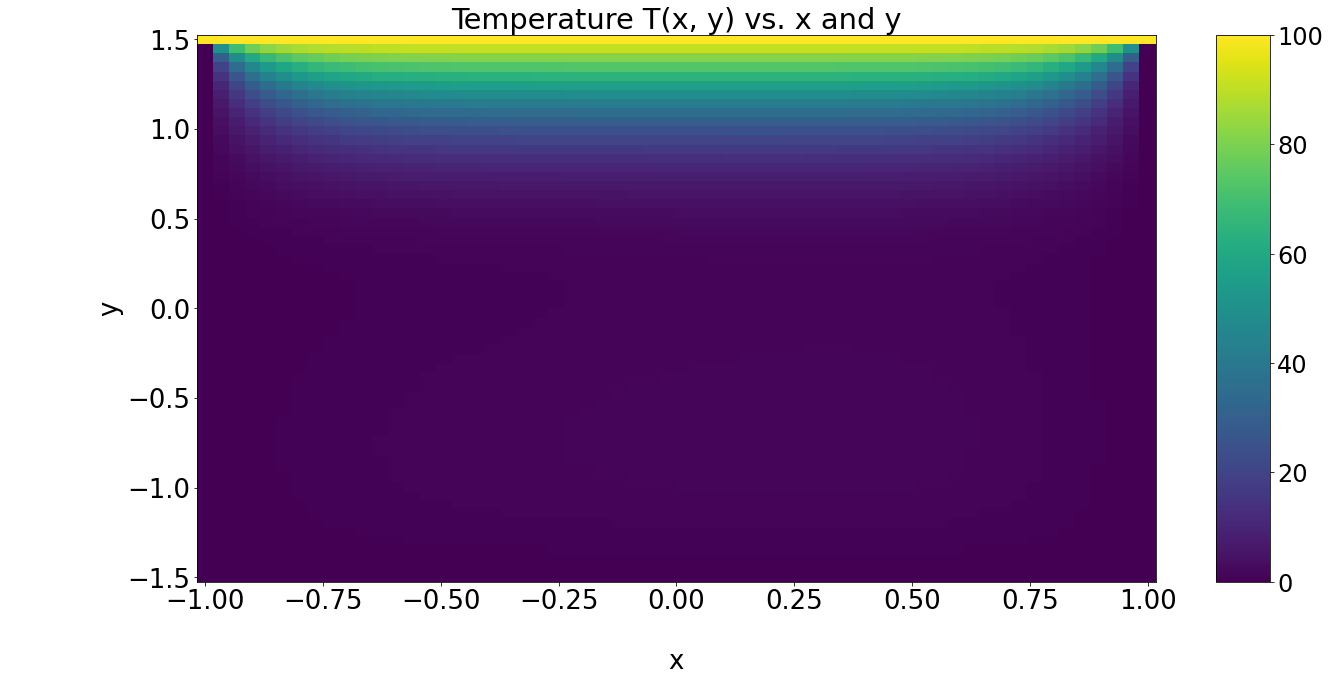

In [10]:
########################### density plot ###########################################################
from matplotlib import pyplot as plt, cm, colors
import numpy as np

# Creating figure and fig-properties
fig = plt.figure(figsize =(20, 10))
ax = plt.axes()
plt.rcParams["figure.autolayout"] = True
plt.rcParams["font.size"] = '24'
 
# Creating color map
my_cmap = plt.get_cmap('hot')

# Creating dataset
Xgrid = X; Ygrid = Y; time = nt - 5
surface = u[time,:,:]

# Creating plot and colorbar
surf = plt.pcolormesh(Xgrid, Ygrid, np.transpose(surface), shading='auto')
fig.colorbar(surf, ax = ax, shrink = 1.0, aspect = 10)

ax.set_title('Temperature T(x, y) vs. x and y')
ax.set_xlabel("\nx")
ax.set_ylabel("\n\n\ny")

##### plt.savefig('temperature_density_plot_2D.png',facecolor="w", transparent=True, dpi=300)
plt.show()